cerou guyader 2007 example page 431

In [1]:
#random walk until reach
import numpy as np
import matplotlib.pyplot as plt
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"

        self.x0 = float(x0)

    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk

        Arguments:
            n_step: Number of steps

        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

        w = np.ones(n_step)*self.x0

        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))

        return w

    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution

        Arguments:
            n_step: Number of steps

        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

        w = np.ones(n_step)*self.x0

        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))

        return w
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution

        Arguments:
            n_step: Number of steps

        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

        w = np.ones(n_step)*self.x0

        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))

        return w
    def gen_normal_jump(self,jump,n_step=100):

        """
    Generate motion by drawing from the Normal distribution

    Arguments:
        n_step: Number of steps

    Returns:
        A NumPy array with `n_steps` points
    """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")

        w = np.ones(n_step)*self.x0

        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(jump))

        return w

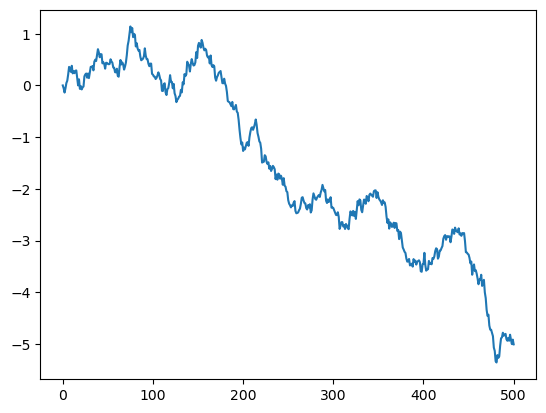

In [2]:
def get_path_first(x0,mu,dt,steps):
    X=[x0]
    n=0
    while n<steps:
        X.append(X[-1]+mu*dt+np.sqrt(dt)*np.random.normal())
        n+=1
    return X

plt.plot(get_path_first(0,-1,0.01,500))


In [10]:
def get_path(a,b,x0,verbose=True,mu=-1,dt=1/1000,Nmax=int(1e8)):
    X=[x0]
    #X,B=[],bm.gen_normal(Nmax)
    n=0
    while n < Nmax :
        if X[-1] >= a and X[-1] <= b :
            X.append(X[-1]+mu*dt+np.sqrt(dt)*np.random.normal())
            n+=1
        elif X[-1] < a :
            if verbose : print(f"Xt reached a ={a}")

            return np.array(X)
        elif X[-1] > b:
            if verbose :print(f"Xt reached b ={b}")
            return np.array(X)
    if verbose : print("not reached :(")
    X=np.array(X)
    return X



In [4]:
X=get_path(0,12,1)

Xt reached a =0


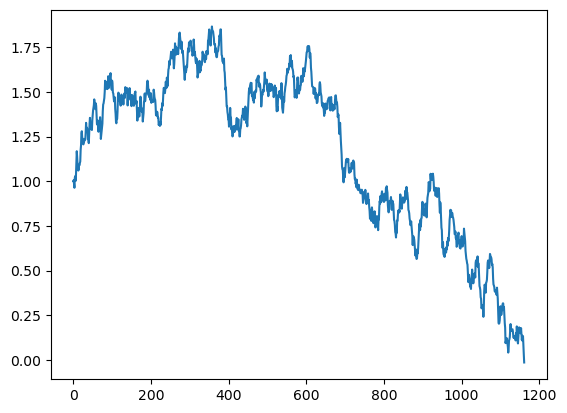

In [7]:
plt.plot(X)
plt.show()

In [21]:
#rare proba
p=2.4e-10


In [39]:
X

array([ 1.        ,  1.00493573,  1.00858354, ...,  0.00611228,
        0.01547804, -0.00672869])

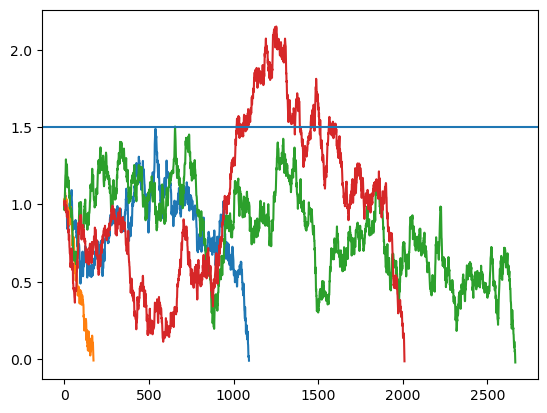

In [33]:
n=4 #nb de particule
k=1
#step 1
trajectories=[]
T=[]
S=[]
for j in range(n):
    X=get_path(0,12,1,verbose=False)
    trajectories.append(X)
    T.append(len(X))
    S.append(X.max())

S.sort()

q=S[n-k-1]
qs=[q]
for _ in range(n):
    plt.plot(trajectories[_])
plt.axhline(y=q)
plt.show()

In [34]:
S

[1.078439483226658, 1.4890588841163253, 1.5034404702857465, 2.149928608491852]

In [66]:
#step 2
M=12
steps = 2
while q < 12:

    nt,ns,nT=[],[],[]
    for j in range(n-k):
        X=get_path(0,12,qs[-1],verbose=False)
        nt.append(X)
        nT.append(len(X))
        ns.append(X.max())
    S[:n-k]=ns
    S.sort()
    q=S[n-k-1]
    qs.append(S[n-k-1])
    if steps == 2:
        for _ in range(n):
            plt.plot(trajectories[_])
        plt.axhline(y=q)
        plt.axhline(y=qs[0])

    plt.show()


qs[-1]

12.006791388990276

In [60]:
np.array(S)>12

array([False, False,  True,  True])

In [63]:
r=sum(np.array(S)>12)/4
print(r)
print(r*(1/n)**len(qs))

0.5
0.0


In [53]:
len(qs)

34573

In [45]:
x(1/n)**1000

0.0